In [1]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import os
import seaborn as sns



In [2]:
# as shown in later analysis, only consider 13:15:00 - 15:00:00 time range
afternoon_start = ' 13:15:00'
morning_start = ' 09:45:00'
morning_end = ' 11:45:00'
morning_early_end = ' 11:25:00'
afternoon_end = ' 15:45:00'
afternoon_early_end = ' 14:55:00'


In [ ]:
from features import add_features


hsi_df = pd.read_excel(os.path.join("dataset", "HSI_min_20250201-20250430.xlsx"),
                   index_col="index")
hsi_df['datetime'] = pd.to_datetime(hsi_df['date'] + ' ' + hsi_df['time'])
hsi_df = hsi_df.set_index('datetime')
hsi_df.head()

hsi_df.to_csv()


,business date,date,time,open,high,low,close,turnover
datetime,,,,,,,,
2025-02-03 09:30:00,2025-02-03,2025-02-03,09:30:00,20048.87,20048.87,20048.87,20048.87,210367186
2025-02-03 09:31:00,2025-02-03,2025-02-03,09:31:00,20040.03,20125.38,20040.03,20125.38,233333295
2025-02-03 09:32:00,2025-02-03,2025-02-03,09:32:00,20120.99,20129.47,20098.00,20098.00,85137616
2025-02-03 09:33:00,2025-02-03,2025-02-03,09:33:00,20097.95,20097.95,19996.73,20040.94,101702443
2025-02-03 09:34:00,2025-02-03,2025-02-03,09:34:00,20039.30,20039.30,20005.90,20014.28,66246961


In [5]:
hsfi_df = pd.read_excel(os.path.join("dataset", "HSFI_min_20250201-20250430.xlsx"),
                   index_col="index")
hsfi_df['datetime'] = pd.to_datetime(hsfi_df['date'] + ' ' + hsfi_df['time'])
hsfi_df = hsfi_df.set_index('datetime')
hsfi_df.head()

,business date,date,time,open,high,low,close,turnover
datetime,,,,,,,,
2025-02-03 09:16:00,2025-02-03,2025-02-03,09:16:00,20030,20044,19851,19949,2217
2025-02-03 09:17:00,2025-02-03,2025-02-03,09:17:00,19953,19985,19908,19980,1143
2025-02-03 09:18:00,2025-02-03,2025-02-03,09:18:00,19977,19982,19930,19934,771
2025-02-03 09:19:00,2025-02-03,2025-02-03,09:19:00,19929,19975,19913,19935,649
2025-02-03 09:20:00,2025-02-03,2025-02-03,09:20:00,19935,20018,19924,20016,906


In [6]:
hscat100_df = pd.read_excel(os.path.join("dataset", "HSCAT100_min_20250201-20250430.xlsx"),
                   index_col="index")
hscat100_df['datetime'] = pd.to_datetime(hscat100_df['date'] + ' ' + hscat100_df['time'])
hscat100_df = hscat100_df.set_index('datetime')
hscat100_df.head()

,business date,date,time,open,high,low,close,turnover
datetime,,,,,,,,
2025-02-05 09:30:00,2025-02-05,2025-02-05,09:30:00,8715.55,8715.55,8715.55,8715.55,0
2025-02-05 09:31:00,2025-02-05,2025-02-05,09:31:00,8713.09,8714.97,8661.06,8661.06,8276545280
2025-02-05 09:32:00,2025-02-05,2025-02-05,09:32:00,8660.70,8660.70,8639.34,8640.56,4040869984
2025-02-05 09:33:00,2025-02-05,2025-02-05,09:33:00,8638.88,8644.66,8638.23,8644.29,2410900032
2025-02-05 09:34:00,2025-02-05,2025-02-05,09:34:00,8643.34,8643.34,8639.14,8640.21,2063066672


In [8]:
hsi_df.to_csv("HSI_1_min_20250201_20250430.csv")
hsfi_df.to_csv("HSFI_1_min_20250201_20250430.csv")
hscat100_df.to_csv("HSCAT100_1_min_20250201_20250430.csv")

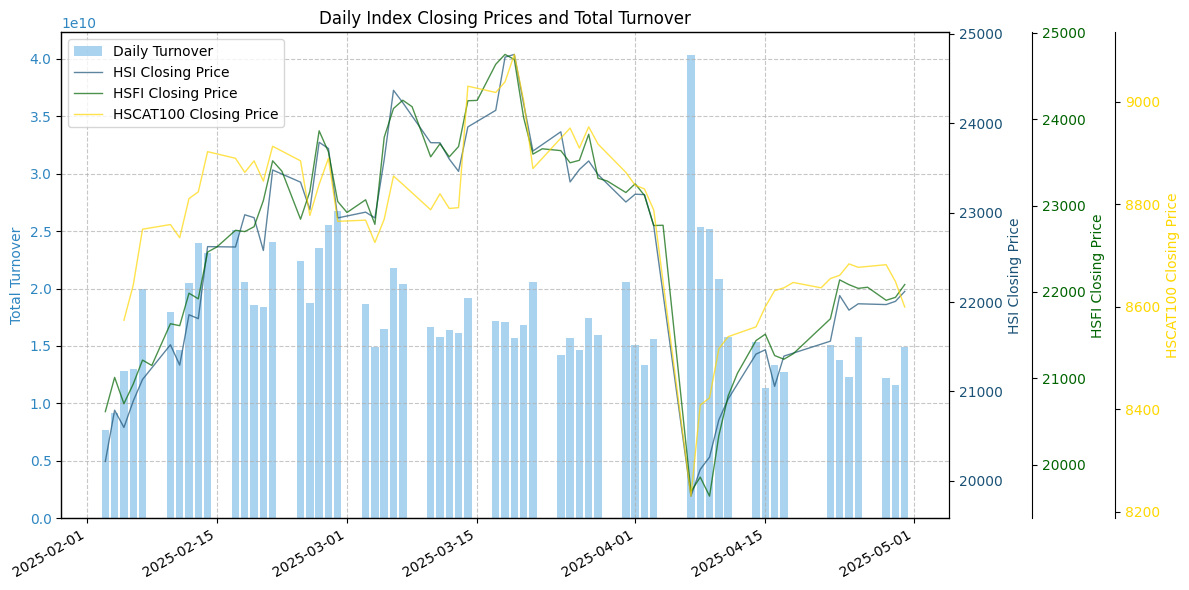

In [ ]:
hsi_df['returns'] = hsi_df['close'].pct_change()
hsi_df.dropna(inplace=True) # Remove NaN from first return

# Resample to daily frequency
daily_hsi_df = hsi_df.resample('D').agg({
    'close': 'last',
    'turnover': 'sum'
}).dropna()

daily_hsfi_df = hsfi_df.resample('D').agg({'close': 'last'}).dropna()
daily_hscat100_df = hscat100_df.resample('D').agg({'close': 'last'}).dropna()

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Create secondary axis for turnover
ax1.bar(daily_hsi_df.index, daily_hsi_df['turnover'], 
        color='#85c1e9', 
        alpha=0.7,
        width=0.8,
        label='Daily Turnover')
ax1.set_ylabel('Total Turnover', color='#2e86c1')
ax1.tick_params(axis='y', labelcolor='#2e86c1')

# Plot HSI Closing Price
ax2 = ax1.twinx()
ax2.plot(daily_hsi_df.index, daily_hsi_df['close'], 
         color='#1a5276', 
         linewidth=1,
         alpha=0.7,
         label='HSI Closing Price')
ax2.set_ylabel('HSI Closing Price', color='#1a5276')
ax2.tick_params(axis='y', labelcolor='#1a5276')

# Plot HSFI Closing Price (Deep Green)
ax3 = ax1.twinx()
ax3.plot(daily_hsfi_df.index, daily_hsfi_df['close'], 
         color='#006400', 
         linewidth=1,
         alpha=0.7,
         label='HSFI Closing Price')
ax3.set_ylabel('HSFI Closing Price', color='#006400')
ax3.tick_params(axis='y', labelcolor='#006400')
ax3.spines['right'].set_position(('outward', 60))

# Plot HSCAT100 Closing Price (Deep Yellow)
ax4 = ax1.twinx()
ax4.plot(daily_hscat100_df.index, daily_hscat100_df['close'], 
         color='#FFD700', 
         linewidth=1,
         alpha=0.7,
         label='HSCAT100 Closing Price')
ax4.set_ylabel('HSCAT100 Closing Price', color='#FFD700')
ax4.tick_params(axis='y', labelcolor='#FFD700')
ax4.spines['right'].set_position(('outward', 120))

# Formatting
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.title('Daily Index Closing Prices and Total Turnover')
ax1.grid(True, linestyle='--', alpha=0.7)
fig.autofmt_xdate()

# Combine legends
lines = []
labels = []
for ax in [ax1, ax2, ax3, ax4]:
    ax_lines, ax_labels = ax.get_legend_handles_labels()
    lines.extend(ax_lines)
    labels.extend(ax_labels)
ax1.legend(lines, labels, loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# pick only the timestamps common to all three
common_idx = (hsi_df.index
                .intersection(hsfi_df.index)
                .intersection(hscat100_df.index))

# slice each series down to that index
hsi_close   = hsi_df.loc[common_idx,   "close"]
hsfi_close  = hsfi_df.loc[common_idx,  "close"]
hscat_close = hscat100_df.loc[common_idx, "close"]

# build your DataFrame
close_df_day = pd.DataFrame({
    "datetime": common_idx,
    "hsi":      hsi_close.values,
    "hsfi":     hsfi_close.values,
    "hscat100": hscat_close.values
})

close_df = pd.DataFrame({"hsi": hsi_df["close"],
                        "hsfi": hsfi_df["close"],
                        "hscat100": hscat100_df["close"]})
close_df = (close_df - close_df.min()) / (close_df.max() - close_df.min())

turnover_df = pd.DataFrame({"hsi": hsi_df["turnover"],
                        "hsfi": hsfi_df["turnover"],
                        "hscat100": hscat100_df["turnover"]})
turnover_df = (turnover_df - turnover_df.min()) / (turnover_df.max() - turnover_df.min())

# Compute Covariance Matrix
cov_matrix_all_days = close_df.cov()
print("Price Covariance Matrix:\n", cov_matrix_all_days)

# Compute Correlation Matrix
corr_matrix_all_days = close_df.corr()
print("\nPrice Correlation Matrix:\n", corr_matrix_all_days)
print("\n")

# Compute Covariance Matrix
turnover_cov_matrix_all_days = turnover_df.cov()
print("Turnover Covariance Matrix:\n", turnover_cov_matrix_all_days)

# Compute Correlation Matrix
turnover_corr_matrix_all_days = turnover_df.corr()
print("\nTurnover Correlation Matrix:\n", turnover_corr_matrix_all_days)


Price Covariance Matrix:
                hsi      hsfi  hscat100
hsi       0.052758  0.051238  0.031611
hsfi      0.051238  0.049742  0.030970
hscat100  0.031611  0.030970  0.026220

Price Correlation Matrix:
                hsi      hsfi  hscat100
hsi       1.000000  0.999730  0.875477
hsfi      0.999730  1.000000  0.880773
hscat100  0.875477  0.880773  1.000000


Turnover Covariance Matrix:
                hsi      hsfi  hscat100
hsi       0.000312  0.000529  0.000286
hsfi      0.000529  0.002731  0.001477
hscat100  0.000286  0.001477  0.001284

Turnover Correlation Matrix:
                hsi      hsfi  hscat100
hsi       1.000000  0.479596  0.443051
hsfi      0.479596  1.000000  0.660081
hscat100  0.443051  0.660081  1.000000


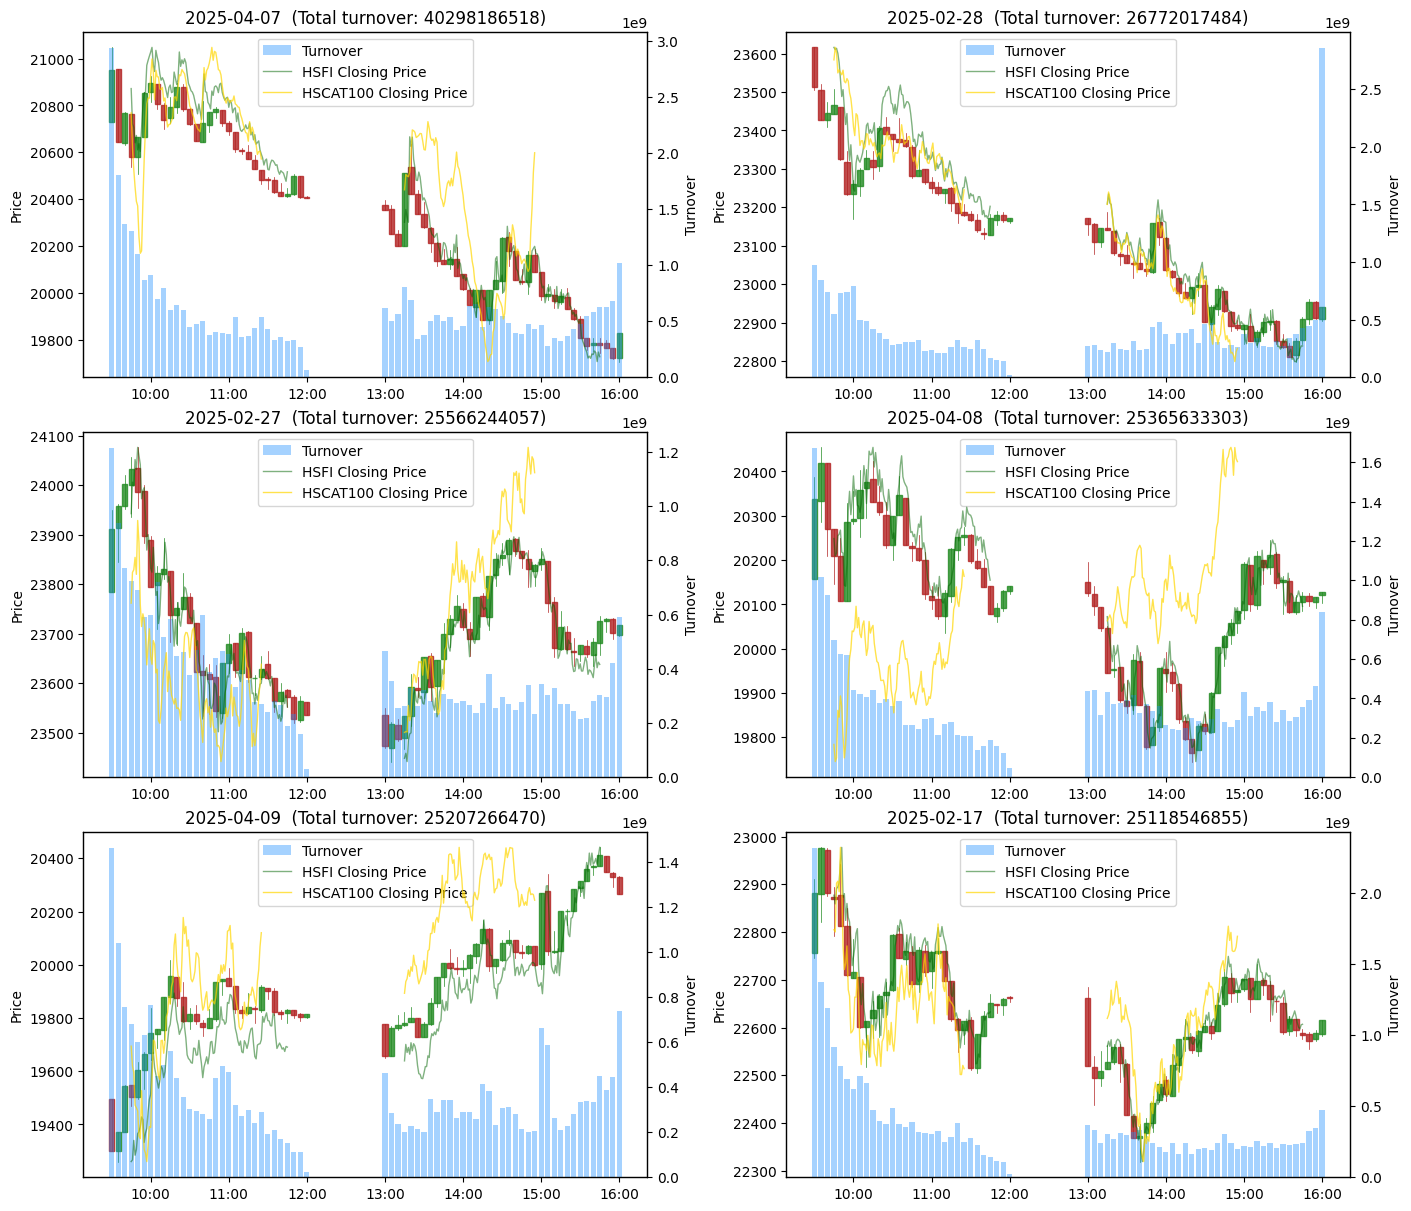

In [ ]:
from utils import plot_intraday_three_curves

plot_intraday_three_curves(hsi_df, hsfi_df, hscat100_df)

In [ ]:
# Assuming 'df' has a DateTimeIndex and a column 'value' with the data points
df = hsi_df

date_range = df.resample('D').sum().index.date


close_df_day_corrs:list = []
for i in range(len(date_range) - 1):
    curr_date = date_range[i]
    next_date = date_range[i + 1]
    curr_mor_df = df[df.index.date == curr_date]
    curr_mor = curr_mor_df.between_time(morning_start.strip(), morning_end.strip())['close']
    curr_aft_df = df[df.index.date == curr_date]
    curr_aft = curr_aft_df.between_time(afternoon_start.strip(), afternoon_end.strip())['close']
    next_aft_df = df[df.index.date == next_date]
    next_aft = next_aft_df.between_time(afternoon_start.strip(), afternoon_end.strip())['close']
    
    min_len = min(len(curr_mor), len(curr_aft), len(next_aft))
    if min_len == 0:
        continue

    curr_mor_trunc = curr_mor.iloc[:min_len]
    curr_aft_trunc = curr_aft.iloc[:min_len]
    next_aft_trunc = next_aft.iloc[:min_len]

    close_df_day = pd.DataFrame({"today_morning": curr_mor_trunc.values,
                "today_afternoon": curr_aft_trunc.values,
                "next_afternoon": next_aft_trunc.values})
    close_df_day_corr = close_df_day.corr()
    close_df_day_corrs.append(np.array(np.abs(close_df_day_corr.values)))

close_df_day_corr_mean = np.nanmean(np.stack(close_df_day_corrs), axis=0)
close_df_day_corr_var = np.nanvar(np.stack(close_df_day_corrs), axis=0)
close_df_day_corr_mean_df = pd.DataFrame(close_df_day_corr_mean, 
                   index=["today_morning", 'today_afternoon', 'next_afternoon'], 
                   columns=["today_morning", 'today_afternoon', 'next_afternoon'], )
close_df_day_corr_var_df = pd.DataFrame(close_df_day_corr_var, 
                   index=["today_morning", 'today_afternoon', 'next_afternoon'], 
                   columns=["today_morning", 'today_afternoon', 'next_afternoon'], )
print("\nHSI Time Range Correlation Mean")
print(close_df_day_corr_mean_df)
print("\nHSI Time Range Correlation Var")
print(close_df_day_corr_var_df)


HSI Time Range Correlation Mean
                 today_morning  today_afternoon  next_afternoon
today_morning         1.000000         0.381097        0.396817
today_afternoon       0.381097         1.000000        0.391814
next_afternoon        0.396817         0.391814        1.000000

HSI Time Range Correlation Var
                 today_morning  today_afternoon  next_afternoon
today_morning         0.000000         0.065061        0.071668
today_afternoon       0.065061         0.000000        0.068610
next_afternoon        0.071668         0.068610        0.000000


In [ ]:
# Assuming 'df' has a DateTimeIndex and a column 'value' with the data points
df = hsi_df

date_range = df.resample('D').sum().index.date

close_df_day_corrs:list = []
for date in date_range:
    hsi_df_day = hsi_df[hsi_df.index.date == date]
    hsfi_df_day = hsfi_df[hsfi_df.index.date == date]
    hscat100_df_day = hscat100_df[hscat100_df.index.date == date]

    close_df_day = pd.DataFrame({"hsi": hsi_df_day["close"],
                        "hsfi": hsfi_df_day["close"],
                        "hscat100": hscat100_df_day["close"]})

    # Compute Correlation Matrix
    close_df_day_corr = close_df_day.corr()
    close_df_day_corrs.append(np.array(np.abs(close_df_day_corr.values)))

close_df_day_corr_mean = np.nanmean(np.stack(close_df_day_corrs), axis=0)
close_df_day_corr_var = np.nanvar(np.stack(close_df_day_corrs), axis=0)
close_df_day_corr_mean_df = pd.DataFrame(close_df_day_corr_mean, 
                   index=["hsi", 'hsfi', 'hscat100'], 
                   columns=["hsi", 'hsfi', 'hscat100'], )
close_df_day_corr_var_df = pd.DataFrame(close_df_day_corr_var, 
                   index=["hsi", 'hsfi', 'hscat100'], 
                   columns=["hsi", 'hsfi', 'hscat100'], )
print("\nIntraday Correlation Mean")
print(close_df_day_corr_mean_df)
print("\nIntraday Correlation Var")
print(close_df_day_corr_var_df)


Intraday Correlation Mean
               hsi      hsfi  hscat100
hsi       1.000000  0.996489  0.665125
hsfi      0.996489  1.000000  0.664313
hscat100  0.665125  0.664313  1.000000

Intraday Correlation Var
               hsi      hsfi  hscat100
hsi       0.000000  0.000007  0.051124
hsfi      0.000007  0.000000  0.050304
hscat100  0.051124  0.050304  0.000000


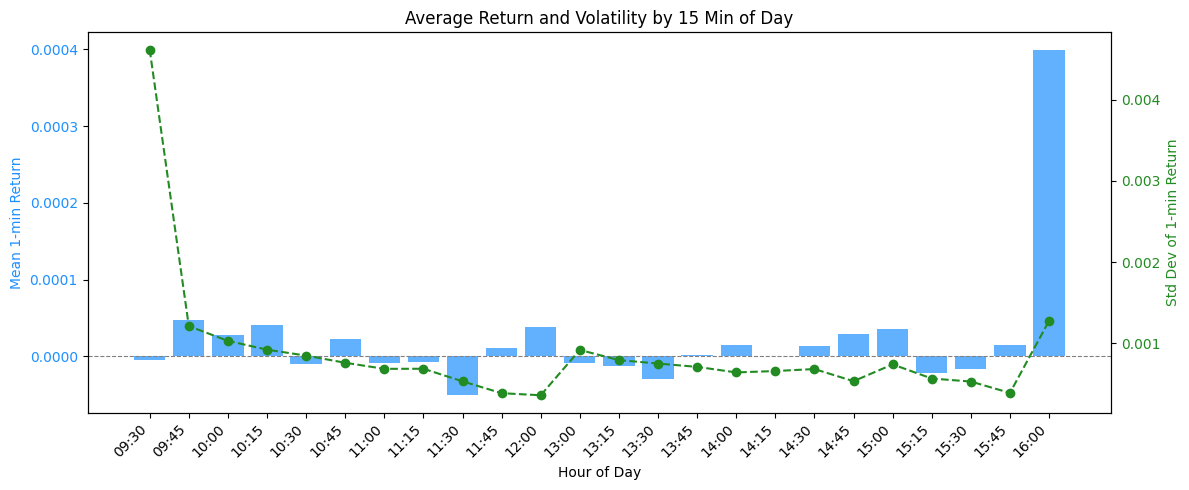

In [ ]:
from utils import plot_ave_returns_and_volatility

plot_ave_returns_and_volatility(hsi_df)

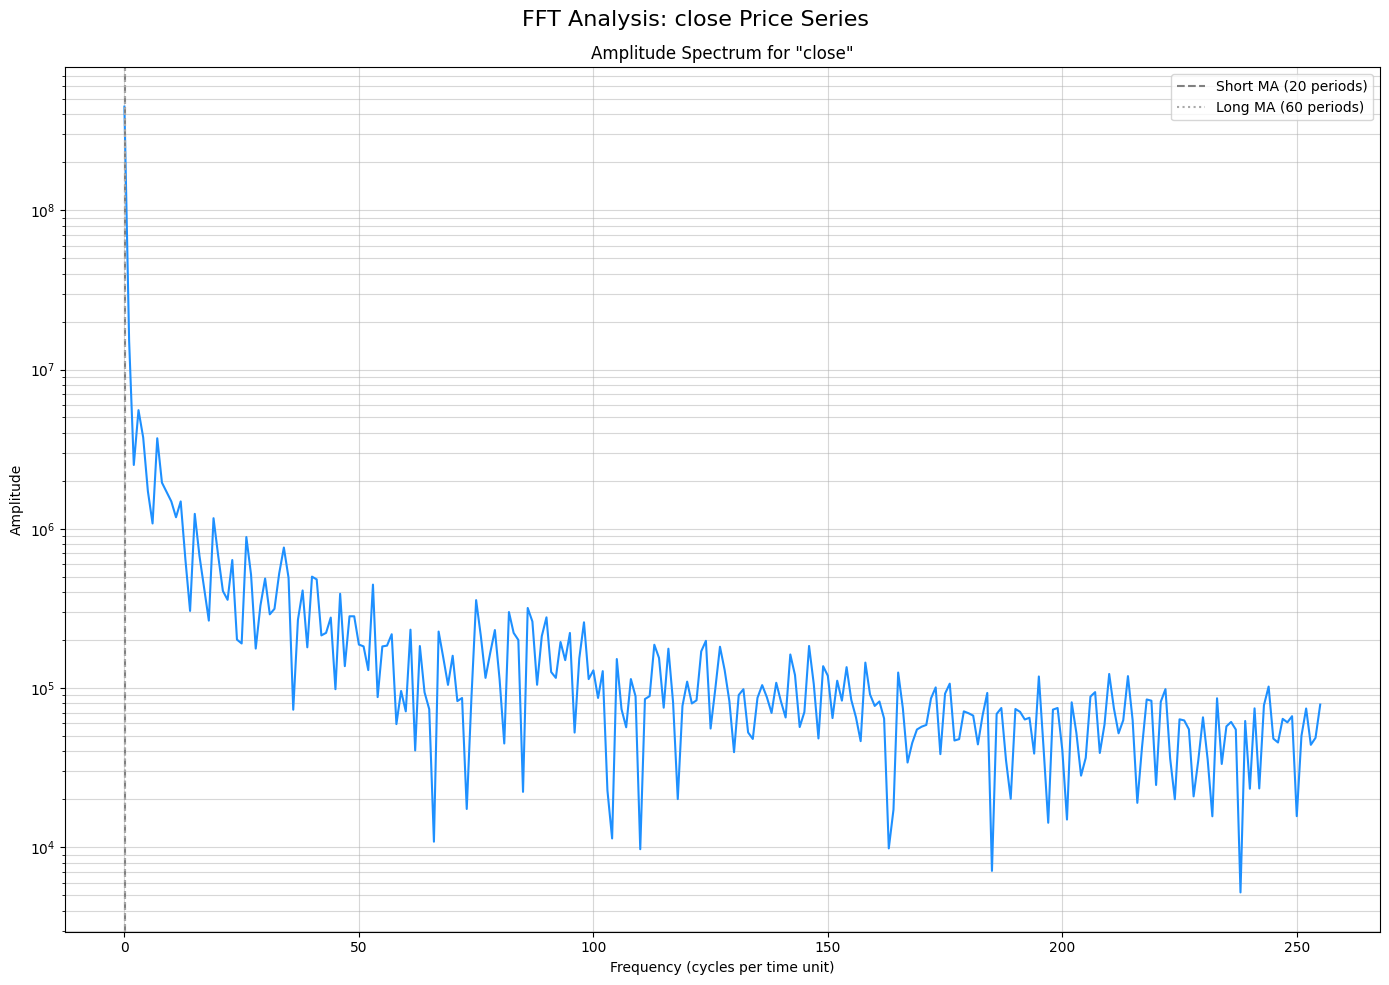

(<Figure size 1400x1000 with 1 Axes>,
 <Axes: title={'center': 'Amplitude Spectrum for "close"'}, xlabel='Frequency (cycles per time unit)', ylabel='Amplitude'>)

In [ ]:
from utils import plot_fft_analysis

plot_fft_analysis(hsi_df)

## Skewness: Measures the asymmetry of the probability distribution.

### Skewness Types

#### Zero Skewness (Symmetric)

The distribution is balanced on both sides of the mean (e.g., a normal distribution). Positive and negative deviations from the mean are equally likely.

#### Positive Skewness (Right-Skewed)

The right tail is longer or fatter than the left tail. This means there are more frequent small losses and a few large gains. The mean is typically greater than the median.
Visual: Bulk of data on the left, long tail to the right.

#### Negative Skewness (Left-Skewed)

The left tail is longer or fatter than the right tail. This means there are more frequent small gains and a few large losses (e.g., market crashes). The mean is typically less than the median.
Visual: Bulk of data on the right, long tail to the left. Financial asset returns often exhibit negative skewness.

### Skewness Interpretation on Results

Highly Negative Skewness: Across all aggregation levels (1-min, 5-min, 10-min, 30-min), the skewness is strongly negative.

* This means the distribution of HSI returns has a significantly longer or fatter left tail compared to its right tail. In practical terms:
* There's a higher probability of large, sudden negative returns (market drops, "crashes") than large positive returns ("rallies" of similar magnitude).
* Small positive returns might be more frequent, but when large moves occur, they are disproportionately to the downside.
* This is a common characteristic of equity markets, often described as "markets take the stairs up and the elevator down."

## Kurtosis

Measures the "tailedness" or "peakedness" of the distribution compared to a normal distribution. It tells us about the propensity for extreme outliers.

### Kurtosis Types

#### Mesokurtic (Kurtosis = 3, or Excess Kurtosis = 0)

This is the kurtosis of a normal distribution. Tails behave as expected under normality.

#### Leptokurtic (Kurtosis > 3, or Excess Kurtosis > 0)

The distribution has "fatter tails" and a sharper peak than a normal distribution. This means extreme values (both positive and negative) are more likely than a normal distribution would predict. Many financial returns are leptokurtic.
Visual: Sharper peak, fatter tails. More probability mass in the tails and at the center.

#### Platykurtic (Kurtosis < 3, or Excess Kurtosis < 0)

The distribution has "thinner tails" and a flatter peak than a normal distribution. Extreme values are less likely. This is less common for financial returns.
Visual: Flatter peak, thinner tails.

### Excess Kurtosis Interpretation on Results

Extremely High Positive Excess Kurtosis (Leptokurtosis): All reported excess kurtosis values are massively positive.

* Extreme events (both very large gains and, especially given the negative skew, very large losses) are far more likely to occur than a normal distribution would predict.
* The market experiences more "surprises" or outliers than would be expected if returns followed a bell curve.
* Standard deviation, if used alone assuming normality, would severely underestimate the likelihood and magnitude of extreme price movements.

In [ ]:
skew_return = hsi_df['returns'].skew()
print(f"Skewness of 1-min Returns: {skew_return:.4f}")
skew_return = hsi_df['returns'].resample("5min").sum().skew()
print(f"Skewness of 5-min Returns: {skew_return:.4f}")
skew_return = hsi_df['returns'].resample("10min").sum().skew()
print(f"Skewness of 10-min Returns: {skew_return:.4f}")
skew_return = hsi_df['returns'].resample("30min").sum().skew()
print(f"Skewness of 30-min Returns: {skew_return:.4f}")

kurt_return = hsi_df['returns'].kurtosis()
print(f"Excess Kurtosis of 1-min Returns: {kurt_return:.4f}")
kurt_return = hsi_df['returns'].resample("5min").sum().kurtosis()
print(f"Excess Kurtosis of 5-min Returns: {kurt_return:.4f}")
kurt_return = hsi_df['returns'].resample("10min").sum().kurtosis()
print(f"Excess Kurtosis of 10-min Returns: {kurt_return:.4f}")
kurt_return = hsi_df['returns'].resample("30min").sum().kurtosis()
print(f"Excess Kurtosis of 30-min Returns: {kurt_return:.4f}")

Skewness of 1-min Returns: -22.0077
Skewness of 5-min Returns: -16.7022
Skewness of 10-min Returns: -18.7035
Skewness of 30-min Returns: -8.4538
Excess Kurtosis of 1-min Returns: 1780.1945
Excess Kurtosis of 5-min Returns: 1464.1094
Excess Kurtosis of 10-min Returns: 1254.3934
Excess Kurtosis of 30-min Returns: 375.3327


## Stationarity Test (ADF)

* Rapid Decay: If the ACF bars quickly fall within the confidence interval (e.g., after 2-3 lags for 1-min data), it means there's little short-term linear predictability. A very short MA (e.g., 3-5 periods) might be used just to smooth out high-frequency noise.
* Significant Spikes: If you see a statistically significant spike at lag k that stands out, it might suggest a cyclical component or dependence at that lag. An MA of length k or k/2 could be considered to capture this. However, such clear, exploitable patterns are rare in ACF of returns for liquid markets.

$$
r_k = \frac{\sum_{t=k+1}^{N} (Y_t - \bar{Y})(Y_{t-k} - \bar{Y})}{\sum_{t=1}^{N} (Y_t - \bar{Y})^2}
$$

where

* $N$ is the number of observations in the series.
* $\overline{Y}$ is the sample mean of the series.
* $Y_t$ is the value of the series at time 
* $Y_{t-k}$ is the value of the series at time $t-k$ ($k$ periods before $t$)
* The numerator is proportional to the sample autocovariance at lag $k$.
* The denominator is proportional to the sample variance of the series (autocovariance at lag $0$).

For the result $r_k$:

* $r_k\approx \pm 1$: Strong positive/negative linear relationship
* $r_k\approx 0$: Weak linear relationship



--- ACF/PACF Analysis for 1-min Returns ---


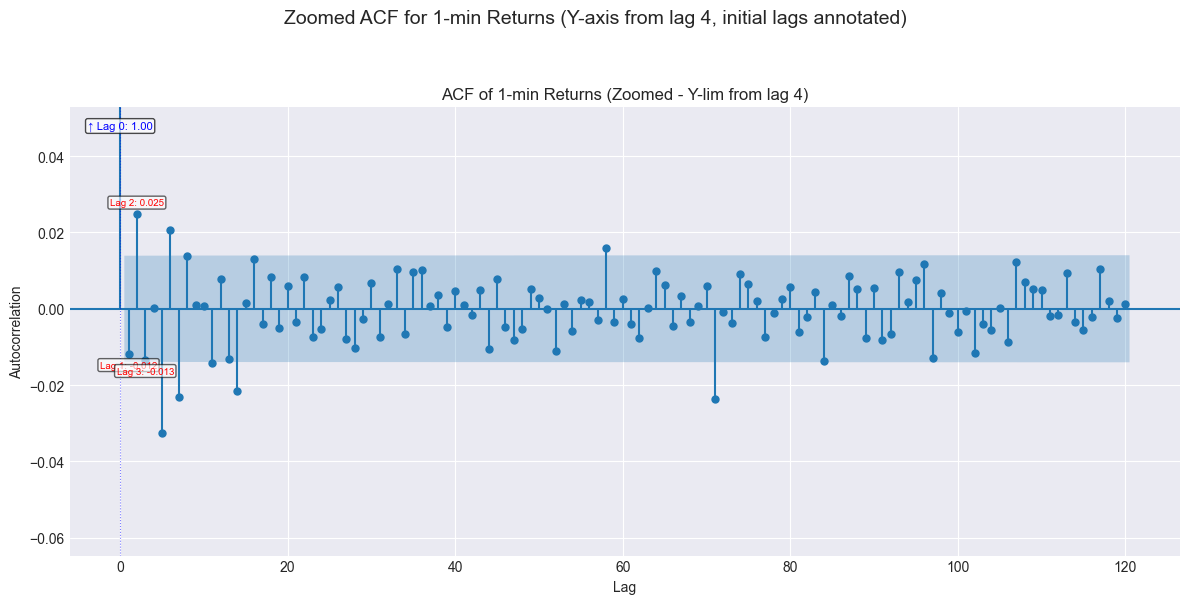

In [ ]:
from utils import plot_zoomed_acf_with_annotations


lags_ignored_zoom = 3 # For y-limit calculation in zoomed ACF plots
nlags_main = 120

# Analysis for Returns
print("\n\n--- ACF/PACF Analysis for 1-min Returns ---")
plot_zoomed_acf_with_annotations(hsi_df['returns'], '1-min Returns', nlags=nlags_main, lags_to_ignore_for_ylim=lags_ignored_zoom)


/var/folders/ww/83rl3s8n05qdsg23vlvbf72w0000gp/T/ipykernel_45232/1374504768.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[roc_col_name] = df['close'].pct_change(periods=window) * 100



Sample of calculated ROCs:
                     ROC_3min  ROC_5min  ROC_10min  ROC_15min  ROC_20min  \
datetime                                                                   
2025-04-30 15:41:00 -0.014990  0.010509  -0.092678  -0.165865  -0.068077   
2025-04-30 15:42:00 -0.023319  0.014541  -0.055270  -0.149825  -0.100762   
2025-04-30 15:43:00 -0.053706 -0.044065  -0.097136  -0.161172  -0.130949   
2025-04-30 15:44:00 -0.024459 -0.055740  -0.096634  -0.150822  -0.139889   
2025-04-30 15:45:00  0.011549 -0.005117  -0.001449  -0.091303  -0.141544   

                     ROC_60min  
datetime                        
2025-04-30 15:41:00  -0.051926  
2025-04-30 15:42:00   0.010373  
2025-04-30 15:43:00   0.049546  
2025-04-30 15:44:00   0.093009  
2025-04-30 15:45:00   0.127642  
ROC_3min 
                - 5th percentile: -0.21524%, 95th percentile: 0.21206%
                - 15th percentile: -0.11863%, 85th percentile: 0.11652%
                - 25th percentile: -0.06997%, 75th perc

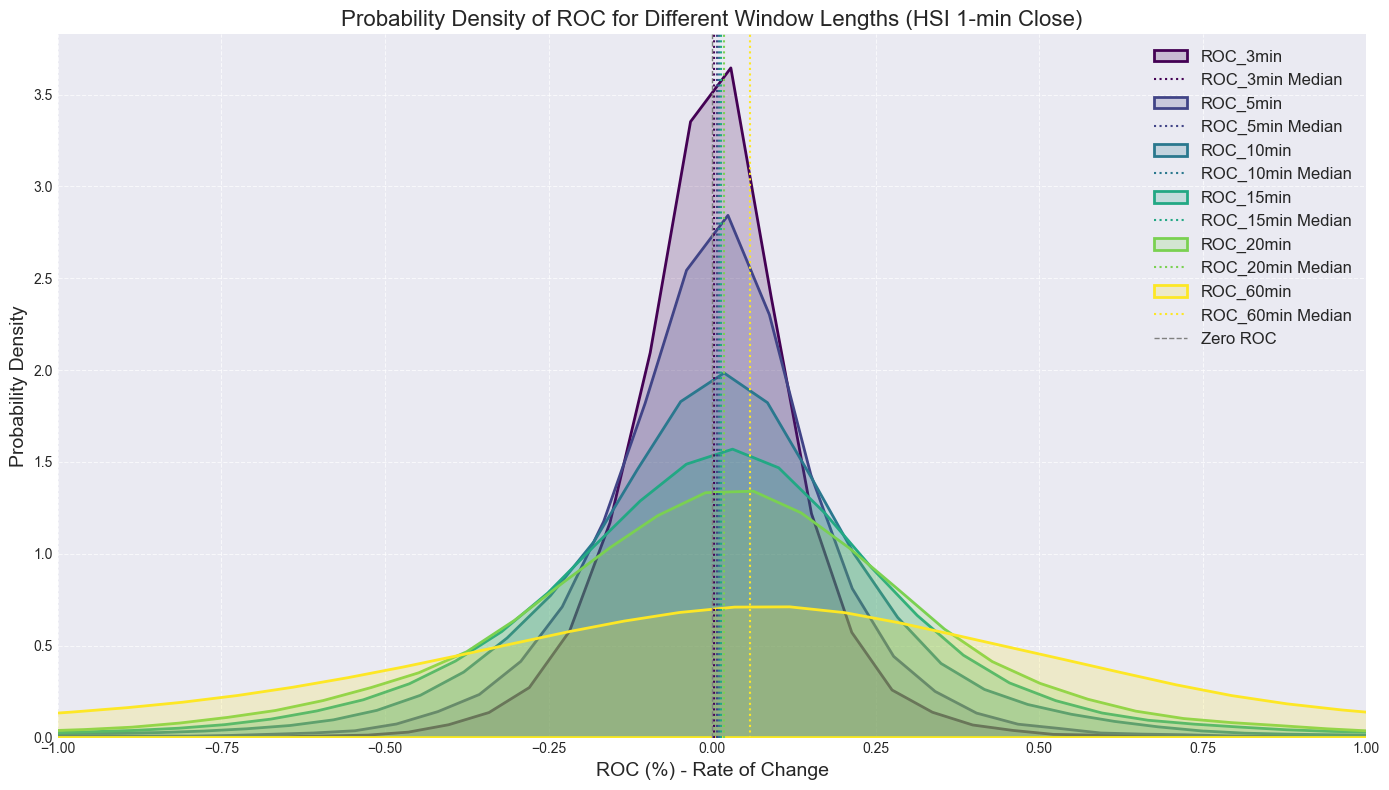

In [ ]:
# --- 2. Define ROC Windows and Calculate ROCs ---
roc_windows_to_compare = [3, 5, 10, 15, 20, 60]  # e.g., 5-min, 10-min, 20-min, 1-hour ROC
roc_data = {} # To store ROC series for each window

hsi_df_no_opening_no_closing_hrs = hsi_df.between_time(morning_start.strip(), afternoon_end.strip())

for df in [hsi_df_no_opening_no_closing_hrs]:
    for window in roc_windows_to_compare:
        roc_col_name = f'ROC_{window}min'
        df[roc_col_name] = df['close'].pct_change(periods=window) * 100
        # Store the non-NaN ROC values for plotting
        roc_data[roc_col_name] = df[roc_col_name].dropna()

    mean_close_price = df['close'].mean()

    print("\nSample of calculated ROCs:")
    print(df[[f'ROC_{w}min' for w in roc_windows_to_compare]].tail())

    # --- 3. Plot KDEs of ROCs for different windows ---
    plt.style.use('seaborn-v0_8-darkgrid')
    plt.figure(figsize=(14, 8))

    colors = plt.cm.viridis(np.linspace(0, 1, len(roc_windows_to_compare)))

    for i, (roc_col_name, roc_series) in enumerate(roc_data.items()):
        sns.kdeplot(roc_series, label=roc_col_name, color=colors[i], fill=True, alpha=0.2, linewidth=2)
        median_val = roc_series.median()
        plt.axvline(median_val, color=colors[i], linestyle=':', linewidth=1.5, 
                    alpha=0.999, label=f'{roc_col_name} Median')
        q95 = roc_series.quantile(0.95)
        q85 = roc_series.quantile(0.85)
        q75 = roc_series.quantile(0.75)
        q25 = roc_series.quantile(0.25)
        q15 = roc_series.quantile(0.15)
        q05 = roc_series.quantile(0.05)
        print(f"""{roc_col_name} 
                - 5th percentile: {q05:.5f}%, 95th percentile: {q95:.5f}%
                - 15th percentile: {q15:.5f}%, 85th percentile: {q85:.5f}%
                - 25th percentile: {q25:.5f}%, 75th percentile: {q75:.5f}%
            """)


    plt.title('Probability Density of ROC for Different Window Lengths (HSI 1-min Close)', fontsize=16)
    plt.xlabel('ROC (%) - Rate of Change', fontsize=14)
    plt.ylabel('Probability Density', fontsize=14)
    plt.axvline(0, color='grey', linestyle='--', linewidth=1, label='Zero ROC')
    plt.legend(fontsize=12)
    plt.grid(True, which='both', linestyle='--', alpha=0.7)

    all_roc_values = pd.concat(list(roc_data.values()))
    plot_min_roc = all_roc_values.quantile(0.001) # Show extreme 0.1% tail
    plot_max_roc = all_roc_values.quantile(0.999) # Show extreme 0.1% tail
    plt.xlim(max(plot_min_roc, -1.0), min(plot_max_roc, 1.0)) # Cap at +/- 1.5% or actual extremes if smaller

    plt.tight_layout()
    plt.show()

/var/folders/ww/83rl3s8n05qdsg23vlvbf72w0000gp/T/ipykernel_45232/3891461633.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[raw_roc_col_name] = pd.concat(all_daily_rocs).sort_index()
/var/folders/ww/83rl3s8n05qdsg23vlvbf72w0000gp/T/ipykernel_45232/3891461633.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[raw_roc_col_name] = pd.concat(all_daily_rocs).sort_index()
/var/folders/ww/83rl3s8n05qdsg23vlvbf72w0000gp/T/ipykernel_45232/3891461633.py:36: SettingWithCopyWarning: 
A value is trying to b


Sample of calculated RAW ROCs:
                     ROC_3min_raw  ROC_5min_raw  ROC_10min_raw  ROC_15min_raw  \
datetime                                                                        
2025-02-03 09:45:00           NaN           NaN            NaN            NaN   
2025-02-03 09:46:00           NaN           NaN            NaN            NaN   
2025-02-03 09:47:00           NaN           NaN            NaN            NaN   
2025-02-03 09:48:00      0.300117           NaN            NaN            NaN   
2025-02-03 09:49:00      0.171611           NaN            NaN            NaN   
2025-02-03 09:50:00     -0.010520      0.250812            NaN            NaN   
2025-02-03 09:51:00     -0.072603      0.126742            NaN            NaN   

                     ROC_20min_raw  ROC_60min_raw     close  
datetime                                                     
2025-02-03 09:45:00            NaN            NaN  19815.63  
2025-02-03 09:46:00            NaN            NaN  1

/var/folders/ww/83rl3s8n05qdsg23vlvbf72w0000gp/T/ipykernel_45232/3891461633.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[smoothed_roc_col_name] = pd.concat(all_daily_smoothed_rocs).sort_index()
/var/folders/ww/83rl3s8n05qdsg23vlvbf72w0000gp/T/ipykernel_45232/3891461633.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[smoothed_roc_col_name] = pd.concat(all_daily_smoothed_rocs).sort_index()
/var/folders/ww/83rl3s8n05qdsg23vlvbf72w0000gp/T/ipykernel_45232/3891461633.py:68: SettingWithCopyWarn


--- Calculating Daily TREND Turns (from Smoothed ROC) ---

--- Average Daily TREND Turns (from Smoothed ROC Sign Changes) ---
ROC_3min_smooth: 58.35 trend turns per day on average.
  Suggested Sizing Factor Base (75% of avg trend turns): 43.76
ROC_5min_smooth: 37.32 trend turns per day on average.
  Suggested Sizing Factor Base (75% of avg trend turns): 27.99
ROC_10min_smooth: 17.80 trend turns per day on average.
  Suggested Sizing Factor Base (75% of avg trend turns): 13.35
ROC_15min_smooth: 11.97 trend turns per day on average.
  Suggested Sizing Factor Base (75% of avg trend turns): 8.97
ROC_20min_smooth: 8.95 trend turns per day on average.
  Suggested Sizing Factor Base (75% of avg trend turns): 6.71
ROC_60min_smooth: 2.22 trend turns per day on average.
  Suggested Sizing Factor Base (75% of avg trend turns): 1.66
ROC_60min 
                - 5th percentile: -0.20857%, 95th percentile: 0.20365%
                - 15th percentile: -0.11658%, 85th percentile: 0.11337%
            

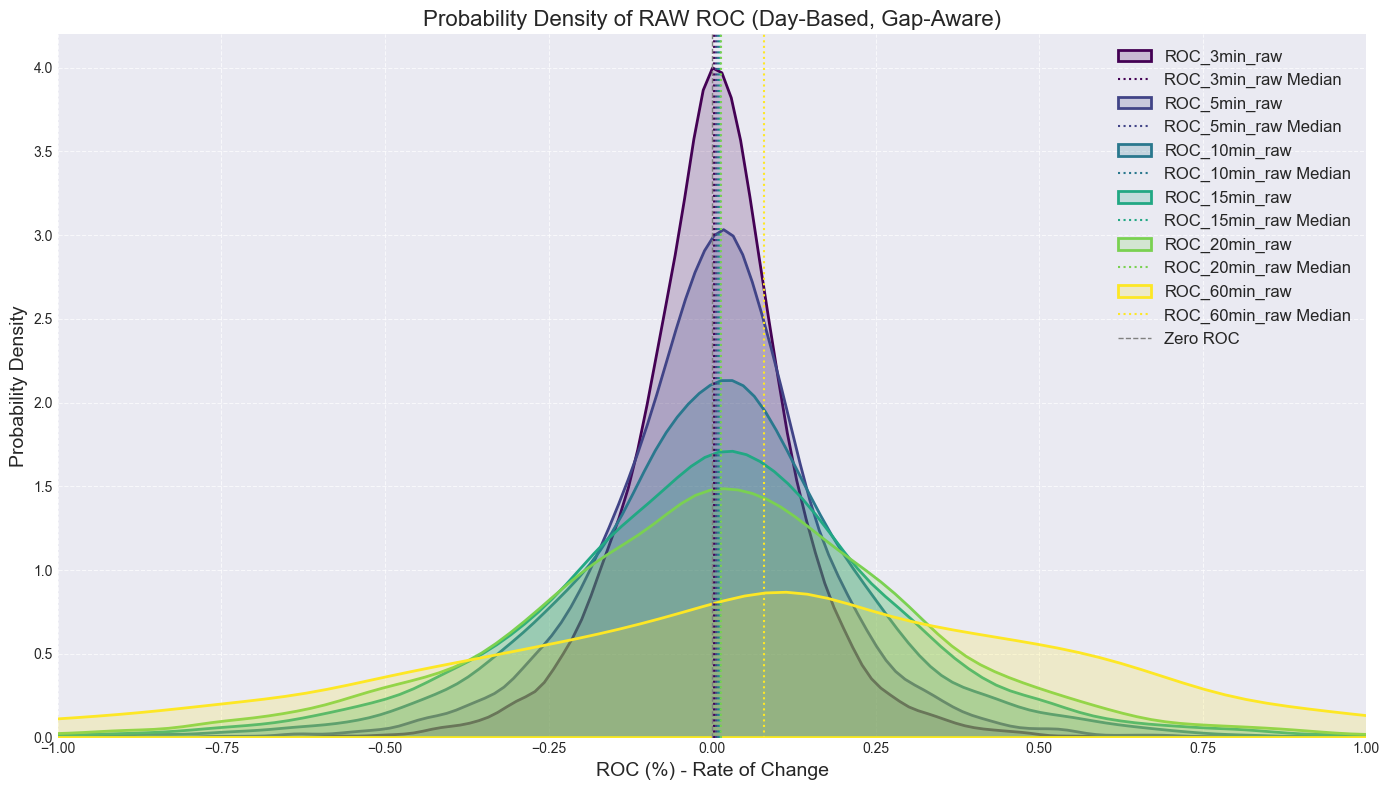


Final DataFrame with Raw and Smoothed ROCs (sample):
                     ROC_3min_raw  ROC_5min_raw  ROC_10min_raw  ROC_15min_raw  \
datetime                                                                        
2025-02-03 09:45:00           NaN           NaN            NaN            NaN   
2025-02-03 09:46:00           NaN           NaN            NaN            NaN   
2025-02-03 09:47:00           NaN           NaN            NaN            NaN   
2025-02-03 09:48:00      0.300117           NaN            NaN            NaN   
2025-02-03 09:49:00      0.171611           NaN            NaN            NaN   
2025-02-03 09:50:00     -0.010520      0.250812            NaN            NaN   
2025-02-03 09:51:00     -0.072603      0.126742            NaN            NaN   
2025-02-03 09:52:00     -0.029945     -0.019127            NaN            NaN   
2025-02-03 09:53:00     -0.009967     -0.059119            NaN            NaN   
2025-02-03 09:54:00      0.083683      0.038853        

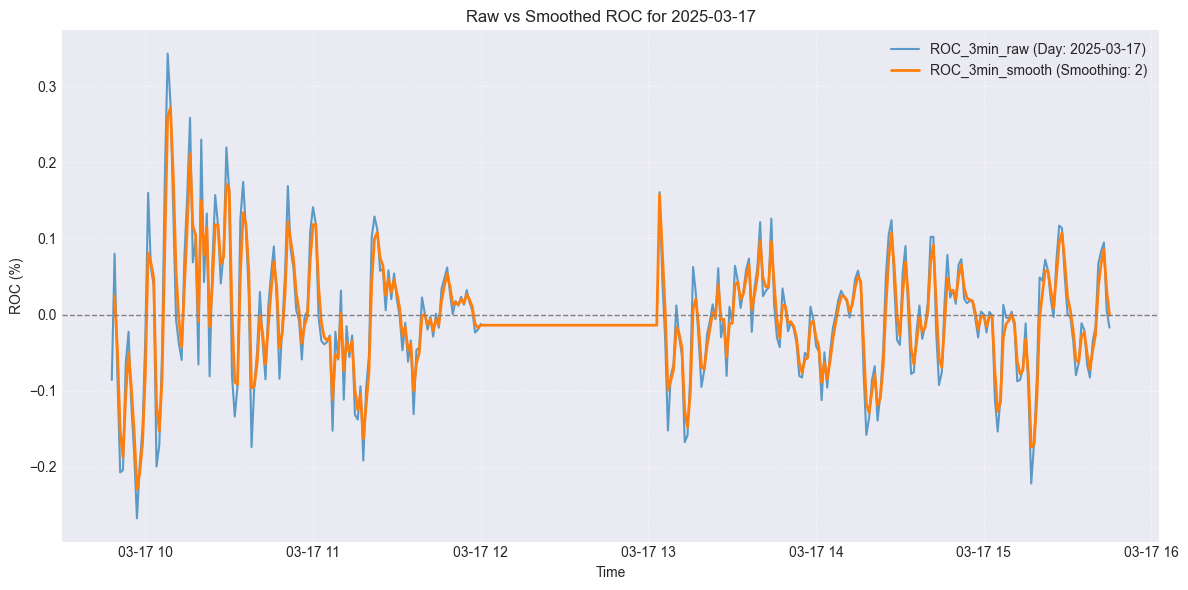

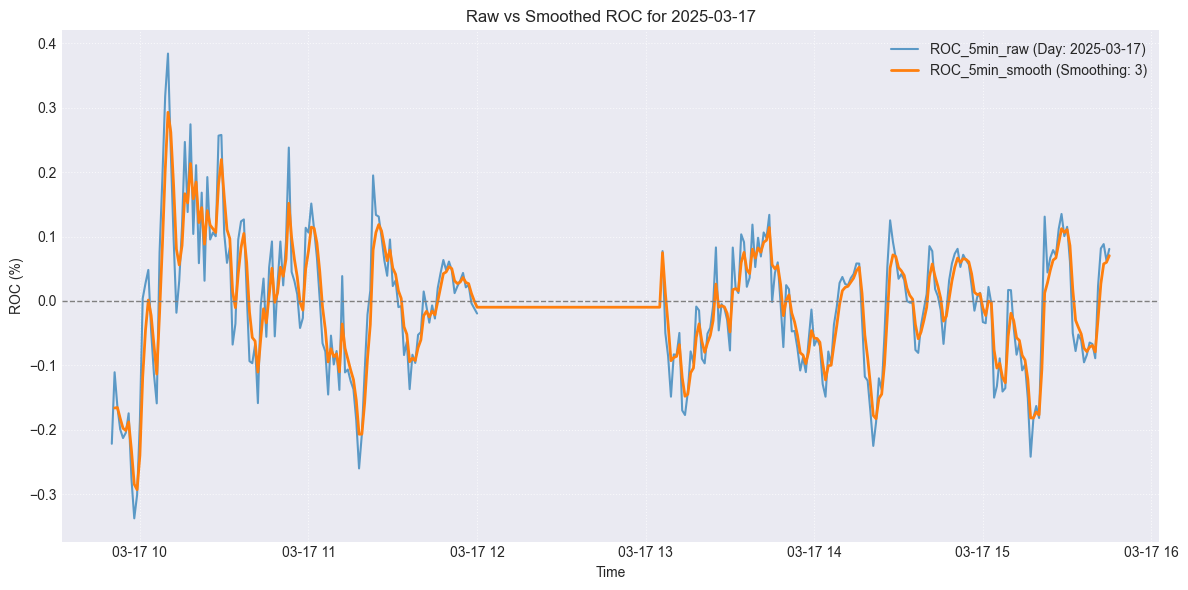

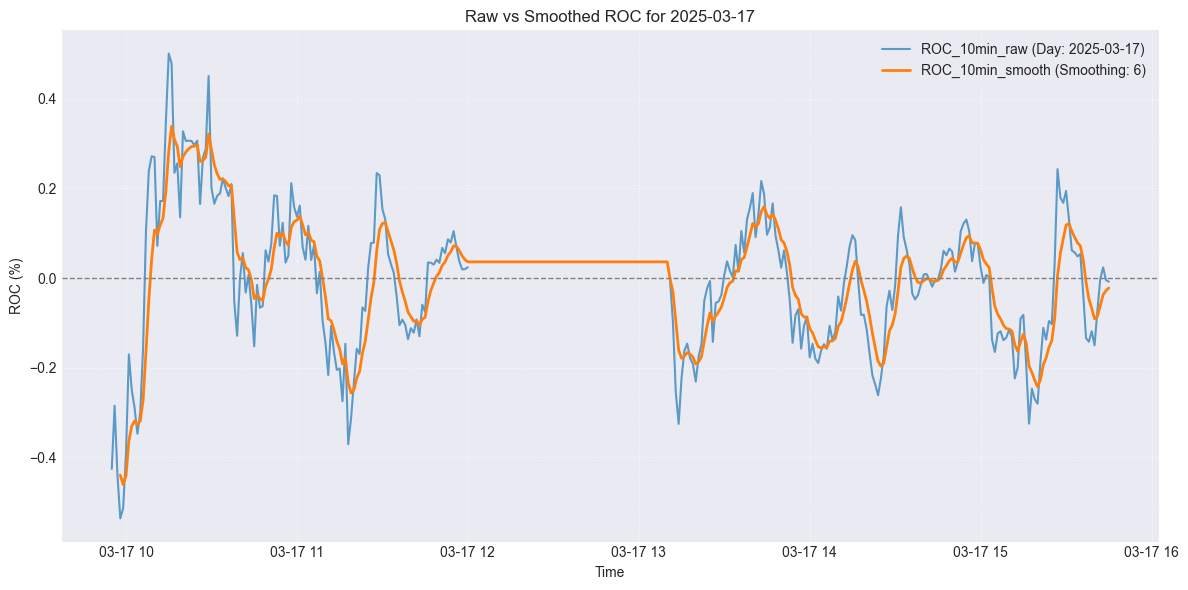

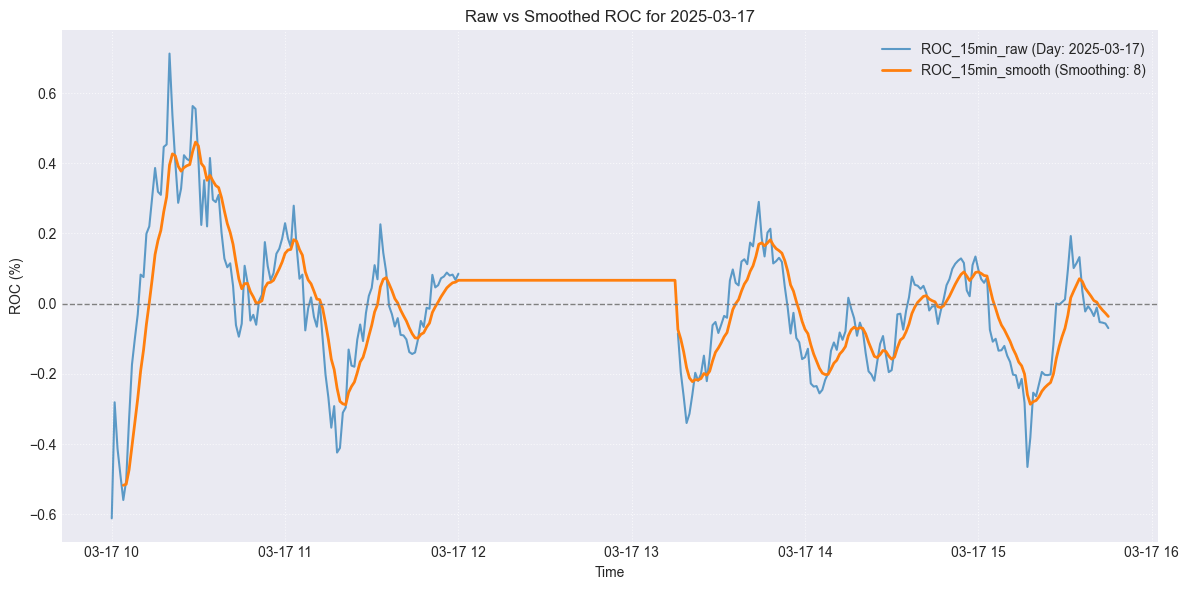

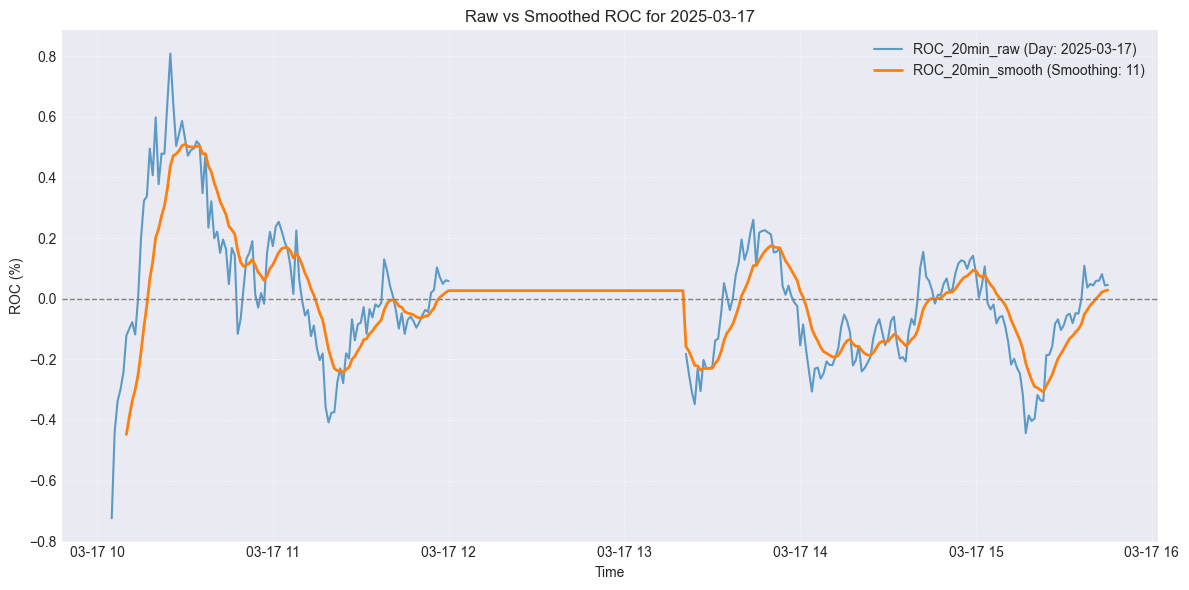

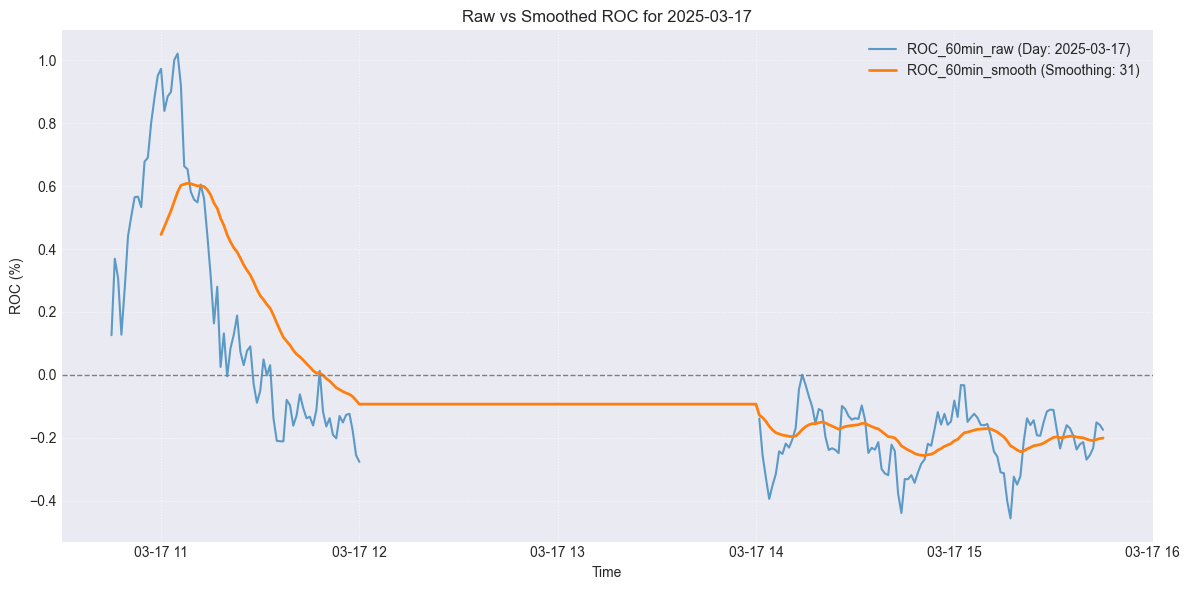

In [ ]:

# --- Configuration ---
roc_windows_to_compare = [3, 5, 10, 15, 20, 60]  # e.g., 5-min, 10-min, 20-min, 1-hour ROC
LARGE_GAP_THRESHOLD = pd.Timedelta(minutes=30)

roc_data_raw = {} # To store non-NaN RAW ROC series for plotting KDEs
df_roc_columns = [] # Keep track of generated ROC column names

# --- 1. Calculate RAW ROCs (Day-based, Gap-Aware) ---
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.to_datetime(df.index)

for window in roc_windows_to_compare:
    raw_roc_col_name = f'ROC_{window}min_raw'
    df_roc_columns.append(raw_roc_col_name)

    def calculate_roc_for_day_with_gaps(daily_close_series, W, gap_threshold, col_name_to_assign):
        if not isinstance(daily_close_series.index, pd.DatetimeIndex):
            daily_close_series.index = pd.to_datetime(daily_close_series.index)
        if len(daily_close_series) <= W:
            return pd.Series(np.nan, index=daily_close_series.index, name=col_name_to_assign)
        
        roc = daily_close_series.pct_change(periods=W) * 100
        time_diffs = daily_close_series.index.to_series().diff()
        large_gaps_ending_at_point = time_diffs > gap_threshold
        mask_invalid_roc = large_gaps_ending_at_point.rolling(window=W, min_periods=1).sum() > 0
        roc[mask_invalid_roc] = np.nan
        return roc.rename(col_name_to_assign)

    all_daily_rocs = []
    if not df.empty:
        for _, group_df in df.groupby(df.index.date):
            daily_roc_series = calculate_roc_for_day_with_gaps(group_df['close'], window, LARGE_GAP_THRESHOLD, raw_roc_col_name)
            all_daily_rocs.append(daily_roc_series)
    
    if all_daily_rocs:
        df[raw_roc_col_name] = pd.concat(all_daily_rocs).sort_index()
    else:
        df[raw_roc_col_name] = pd.Series(np.nan, index=df.index)

    roc_data_raw[raw_roc_col_name] = df[raw_roc_col_name].dropna()

print("\nSample of calculated RAW ROCs:")
print(df[df_roc_columns + ['close']].head(7))
print("...")

# --- 2. Smooth the ROCs (Per-Day Basis) ---
smoothed_roc_col_names = []
for idx, raw_roc_col_name in enumerate(df_roc_columns):
    smoothed_roc_col_name = raw_roc_col_name.replace('_raw', '_smooth')
    smoothed_roc_col_names.append(smoothed_roc_col_name)
    
    # Helper function to smooth ROC for a single day
    def smooth_roc_for_day(daily_raw_roc_series, smoothing_window, col_name_to_assign):
        if daily_raw_roc_series.dropna().empty or len(daily_raw_roc_series.dropna()) < smoothing_window:
            return pd.Series(np.nan, index=daily_raw_roc_series.index, name=col_name_to_assign)
        # Use EMA for smoothing. adjust=False is common for financial data.
        # min_periods ensures we get values even if shorter than window at start
        return daily_raw_roc_series.ewm(span=smoothing_window, adjust=False, min_periods=max(1,smoothing_window//2+1)).mean().rename(col_name_to_assign)

    all_daily_smoothed_rocs = []
    if not df.empty and raw_roc_col_name in df:
        for _, group_df in df.groupby(df.index.date):
            if raw_roc_col_name in group_df:
                daily_smoothed_roc = smooth_roc_for_day(group_df[raw_roc_col_name], roc_windows_to_compare[idx]//2+1, smoothed_roc_col_name)
                all_daily_smoothed_rocs.append(daily_smoothed_roc)
    
    if all_daily_smoothed_rocs:
        df[smoothed_roc_col_name] = pd.concat(all_daily_smoothed_rocs).sort_index()
    else:
        df[smoothed_roc_col_name] = pd.Series(np.nan, index=df.index)


# --- 3. Compute Daily TREND Turns (from SMOOTHED ROC) and Averages ---
daily_trend_turns_data = {}
average_daily_trend_turns = {}
suggested_sizing_factor_base = {}

print("\n--- Calculating Daily TREND Turns (from Smoothed ROC) ---")

for roc_col_name_smooth in smoothed_roc_col_names:
    if df[roc_col_name_smooth].isnull().all():
        print(f"Skipping trend turn calculation for {roc_col_name_smooth} as it contains all NaNs.")
        average_daily_trend_turns[roc_col_name_smooth] = np.nan
        suggested_sizing_factor_base[roc_col_name_smooth] = np.nan
        daily_trend_turns_data[roc_col_name_smooth] = []
        continue

    current_smoothed_roc_series = df[roc_col_name_smooth]
    daily_turns_list = []

    if not isinstance(current_smoothed_roc_series.index, pd.DatetimeIndex):
        current_smoothed_roc_series.index = pd.to_datetime(current_smoothed_roc_series.index)

    for date_group, day_series in current_smoothed_roc_series.groupby(current_smoothed_roc_series.index.date):
        valid_day_roc = day_series.dropna() 

        if len(valid_day_roc) < 2:
            daily_turns_list.append(0)
            continue
        
        signs = np.sign(valid_day_roc)
        sign_changes = signs.diff().fillna(0) # fillna for first element
        num_turns_today = (sign_changes != 0).sum()
        daily_turns_list.append(num_turns_today)

    daily_trend_turns_data[roc_col_name_smooth] = daily_turns_list
    if daily_turns_list:
        average_daily_trend_turns[roc_col_name_smooth] = np.mean(daily_turns_list)
        suggested_sizing_factor_base[roc_col_name_smooth] = 0.75 * average_daily_trend_turns[roc_col_name_smooth]
    else:
        average_daily_trend_turns[roc_col_name_smooth] = np.nan
        suggested_sizing_factor_base[roc_col_name_smooth] = np.nan


print("\n--- Average Daily TREND Turns (from Smoothed ROC Sign Changes) ---")
for roc_col, avg_turns in average_daily_trend_turns.items():
    if pd.notna(avg_turns):
        print(f"{roc_col}: {avg_turns:.2f} trend turns per day on average.")
        print(f"  Suggested Sizing Factor Base (75% of avg trend turns): {suggested_sizing_factor_base[roc_col]:.2f}")
    else:
        print(f"{roc_col}: Not enough data to calculate average trend turns.")


# --- 4. Plot KDEs of RAW ROCs (as per original request) ---
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(14, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(roc_windows_to_compare)))

# roc_data_raw contains the raw ROCs for KDE plotting
for i, (raw_roc_col_name, roc_series) in enumerate(roc_data_raw.items()):
    if not roc_series.empty:
        sns.kdeplot(roc_series, label=raw_roc_col_name, color=colors[i], fill=True, alpha=0.2, linewidth=2)
        median_val = roc_series.median()
        plt.axvline(median_val, color=colors[i], linestyle=':', linewidth=1.5, 
                    alpha=0.999, label=f'{raw_roc_col_name} Median')
        
        q95 = roc_series.quantile(0.95)
        q85 = roc_series.quantile(0.85)
        q75 = roc_series.quantile(0.75)
        q25 = roc_series.quantile(0.25)
        q15 = roc_series.quantile(0.15)
        q05 = roc_series.quantile(0.05)
        print(f"""{roc_col_name} 
                - 5th percentile: {q05:.5f}%, 95th percentile: {q95:.5f}%
                - 15th percentile: {q15:.5f}%, 85th percentile: {q85:.5f}%
                - 25th percentile: {q25:.5f}%, 75th percentile: {q75:.5f}%
            """)
    else:
        print(f"\n{raw_roc_col_name} - No raw data to plot KDE.")

plt.title('Probability Density of RAW ROC (Day-Based, Gap-Aware)', fontsize=16)
plt.xlabel('ROC (%) - Rate of Change', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)
plt.axvline(0, color='grey', linestyle='--', linewidth=1, label='Zero ROC')

if any(not s.empty for s in roc_data_raw.values()):
    all_roc_values = pd.concat([s for s in roc_data_raw.values() if not s.empty])
    if not all_roc_values.empty:
        plot_min_roc = all_roc_values.quantile(0.001) 
        plot_max_roc = all_roc_values.quantile(0.999)
        final_min_roc = max(plot_min_roc if pd.notna(plot_min_roc) else -1.0, -1.0) 
        final_max_roc = min(plot_max_roc if pd.notna(plot_max_roc) else 1.0, 1.0)
        if final_min_roc >= final_max_roc: final_min_roc, final_max_roc = -1.0, 1.0
        plt.xlim(final_min_roc, final_max_roc)
    else: plt.xlim(-1.0, 1.0)
else:
    print("No RAW ROC data available for plotting limits.")
    plt.xlim(-1.0, 1.0)

plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nFinal DataFrame with Raw and Smoothed ROCs (sample):")
print(df[df_roc_columns + smoothed_roc_col_names + ['close']].head(15))
print("...")
print(df[df_roc_columns + smoothed_roc_col_names + ['close']].tail(15))

# Optional: Plot raw vs smoothed ROC for one specific day and window to visualize
# This requires a bit more specific selection of data
try:
    example_day = df.index.date[len(df)//2] # Pick a day from the middle
    df_day_example = df[df.index.date == example_day]
    for example_roc_raw, example_roc_smooth, roc_smooth_win in list(zip(df_roc_columns, smoothed_roc_col_names, roc_windows_to_compare)):
        if not df_day_example.empty and example_roc_raw in df_day_example and example_roc_smooth in df_day_example:
            plt.figure(figsize=(12,6))
            plt.plot(df_day_example.index, df_day_example[example_roc_raw], label=f'{example_roc_raw} (Day: {example_day})', alpha=0.7)
            plt.plot(df_day_example.index, df_day_example[example_roc_smooth], label=f'{example_roc_smooth} (Smoothing: {roc_smooth_win//2+1})', linewidth=2)
            plt.title(f'Raw vs Smoothed ROC for {example_day}')
            plt.xlabel('Time')
            plt.ylabel('ROC (%)')
            plt.axhline(0, color='grey', linestyle='--', linewidth=1)
            plt.legend()
            plt.grid(True, linestyle=':', alpha=0.7)
            plt.tight_layout()
            plt.show()
except IndexError:
    print("Not enough data to plot example day comparison.")